**Title:**
Prediction Model for Heart Disease Diagnosis using Heart Disease Dataset from University of California, Irvine



**Group 24**

**Introduction:**

Heart Disease is a major issue which contributes to global morbidity and mortality (Dai et al., 2021). In the United States of America, one person dies every 34 seconds from a heart disease (Centers for Disease Control and Prevention, 2022). Many people who have a heart disease do not show any physical symptoms and as a result are not diagnosed (Jin 2014). In turn, these individuals are not taking medications to help prevent the progression of the heart disease. Thus, predictive models are needed to help diagnose patients especially those who are asymptomatic in order to intervene with the progression of the disease. 

In this project, we will be examining the Heart Disease Data from the University of California, Irvine's Machine Learning Repository. The dataset is collected from three separate countries, the United States, Switerland, and Hungary. It is composed of 14 different variables which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. All 14 variables are quantatitive.

The major role of this project is to use the variables from the dataset to help predict whether a patient has a heart disease or not. In the methods we will discuss further which variables we will be examining.

**Preliminary exploratory data analysis:**



We obtained the heart disease data from the UCI ICS website as seen in the below code. Originally, the data was collected from four separate regions, Hungary, Switzerland, Cleveland, and Long Beach. As the original data sets did not have the column names, we added that into our data set based on the documentation. In our data set, we combined all four regions to create the "heart_data" dataset for our project. To do so we used rbind for all invidual datasets which had the same number of variables.

In [1]:
library (ggplot2)
library (tidyverse)
library(tidymodels)
library(dplyr)
library (cowplot)
library (knitr)
set.seed (42)

hungary <- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = FALSE)
colnames(hungary) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

switzerland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names = FALSE)
colnames(switzerland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleveland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

va<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = FALSE)
colnames(va) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_data <- rbind (hungary,switzerland,cleveland,va)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ 

From the 14 variables, we will examine only 6 which are: age, sex, blood pressure, cholestrol, fasting blooding sugar, and diagnosis of heart disease.

This is because the risk factors associated with heart disease according to the Centre for Disease and Prevention (Centers for Disease Control and Prevention, 2022) are:

-*age* (in years)
 
-*sex* (0= Female, 1= Male)

-high blood pressure (which is measured using the variable *trestbps* from the data set, in mmHg)

-high cholesterol (which is the variable *chol* from our data set, in mg/dl)

-diabetes (which is the variable *fbs* from our data set and wich desribes whether fasting blood sugar >120 mg/dl, if 0= False/ No Diabetes, 1= True/Diabetes) 


For the diagnosis of heart disease, the original dataset contains the variable "num". 
From the original dataset's documentation  num=> 1 represented a diagnosis of heart disease and num=0 represented no heart disease diagnosis. The original dataset separated the heart disease diagnosis based on different severity levels. However since we are only interested in whether there was a diagnosis or not, we changed the labelling to a binary label with 0 and 1, where any num greater or equal to 1 became 1 indicating a diagnosis of heart disease.

In [2]:
heart_data_cleaned <- heart_data %>%
  select('age', 'sex', 'trestbps', 'chol', 'fbs', 'num') 
heart_data_cleaned$num [heart_data_cleaned$num == "2"] <- "1"
heart_data_cleaned$num [heart_data_cleaned$num == "3"] <- "1"
heart_data_cleaned$num [heart_data_cleaned$num == "4"] <- "1"

Below, we created a summary table of our 6 variables where we show the number of observations, mean or proportion (for variables with levels), number of missing data, and the range or levels for each variable.

In [3]:
#-------------The Commented out code below is to get the range-------------
# as.numeric(range(heart_data_cleaned$age, na.rm=TRUE))
# as.numeric(range(heart_data_cleaned$sex, na.rm=TRUE))
# as.numeric(range(heart_data_cleaned$trestbps, na.rm=TRUE))
# as.numeric(range(heart_data_cleaned$chol, na.rm=TRUE))
# as.numeric(range(heart_data_cleaned$fbs, na.rm=TRUE))
# as.numeric(range(heart_data_cleaned$num, na.rm=TRUE))

tab <- matrix(c(nrow(heart_data_cleaned), round(mean(heart_data_cleaned$age), digits=2), sum(heart_data_cleaned$age=="?"), '28-77',
                nrow(heart_data_cleaned), "21.09% Female" ,sum(heart_data_cleaned$sex=="?"), "0 = Female, 1 = Male",
                nrow(heart_data_cleaned), round(mean(as.numeric(heart_data_cleaned$trestbps), na.rm=TRUE), digits=2), sum(heart_data_cleaned$trestbps=="?"), "0-98",
                nrow(heart_data_cleaned), round(mean(as.numeric(heart_data_cleaned$chol), na.rm=TRUE), digits=2), sum(heart_data_cleaned$chol=="?"), "0-85",
                nrow(heart_data_cleaned), "75.22% False", sum(heart_data_cleaned$fbs=="?"), "0 = False, 1 = True",
                nrow(heart_data_cleaned), "44.67% No Heart Disease",sum(is.na(heart_data_cleaned$num)), "0 = No Heart Disease, 1 = Heart Disease"), ncol=4, byrow=TRUE)
colnames(tab) <- c('Number of Observations','Mean or Proportion','Number of Missing Data', 'Range or Levels')
rownames(tab) <- c('Age (years)','Sex','Resting Blood Pressure (mmHg)','Cholesterol (mg/dl)','Fasting Blood Sugar > 120 mg/dl','Heart Disease Diagnosis')
tab <- as.table(tab)
cat ("Table 1: Summary of the Variables")
tab



Warning message in mean(as.numeric(heart_data_cleaned$trestbps), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(heart_data_cleaned$chol), na.rm = TRUE):
“NAs introduced by coercion”


Table 1

                                Number of Observations Mean or Proportion     
Age (years)                     920                    53.51                  
Sex                             920                    21.09% Female          
Resting Blood Pressure (mmHg)   920                    132.13                 
Cholesterol (mg/dl)             920                    199.13                 
Fasting Blood Sugar > 120 mg/dl 920                    75.22% False           
Heart Disease Diagnosis         920                    44.67% No Heart Disease
                                Number of Missing Data
Age (years)                     0                     
Sex                             0                     
Resting Blood Pressure (mmHg)   59                    
Cholesterol (mg/dl)             30                    
Fasting Blood Sugar > 120 mg/dl 90                    
Heart Disease Diagnosis         0                     
                                Range or Levels               

Next we cleaned our data. We moved rows with "?" which are the NAs from our data. Furthermore, we changed the variables that should be numeric to numeric (chol, trestbps) and set the variables with factors to factors (fbs, num, sex).

In [4]:
heart_data_cleaned <- subset (heart_data_cleaned, fbs != "?")
heart_data_cleaned <- subset (heart_data_cleaned, chol != "?")
heart_data_cleaned <- mutate (heart_data_cleaned, trestbps = as.numeric (trestbps))
heart_data_cleaned <- mutate (heart_data_cleaned, chol = as.numeric (chol))
heart_data_cleaned <- mutate (heart_data_cleaned, fbs = as_factor (fbs))
heart_data_cleaned <- mutate (heart_data_cleaned, num = as_factor(num))
heart_data_cleaned <- mutate (heart_data_cleaned, sex = as_factor(sex))


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Next we split our data set into a training and testing set. We us 75% of the data as training set and 25% as the testing set. 

In [5]:
#split data into training and testing data
heart_data_split <- initial_split(heart_data_cleaned, prop = 0.75, strata = num)  
heart_data_train <- training(heart_data_split)   
heart_data_test <- testing(heart_data_split)

Then we visualized our data using **only the training set** below:

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


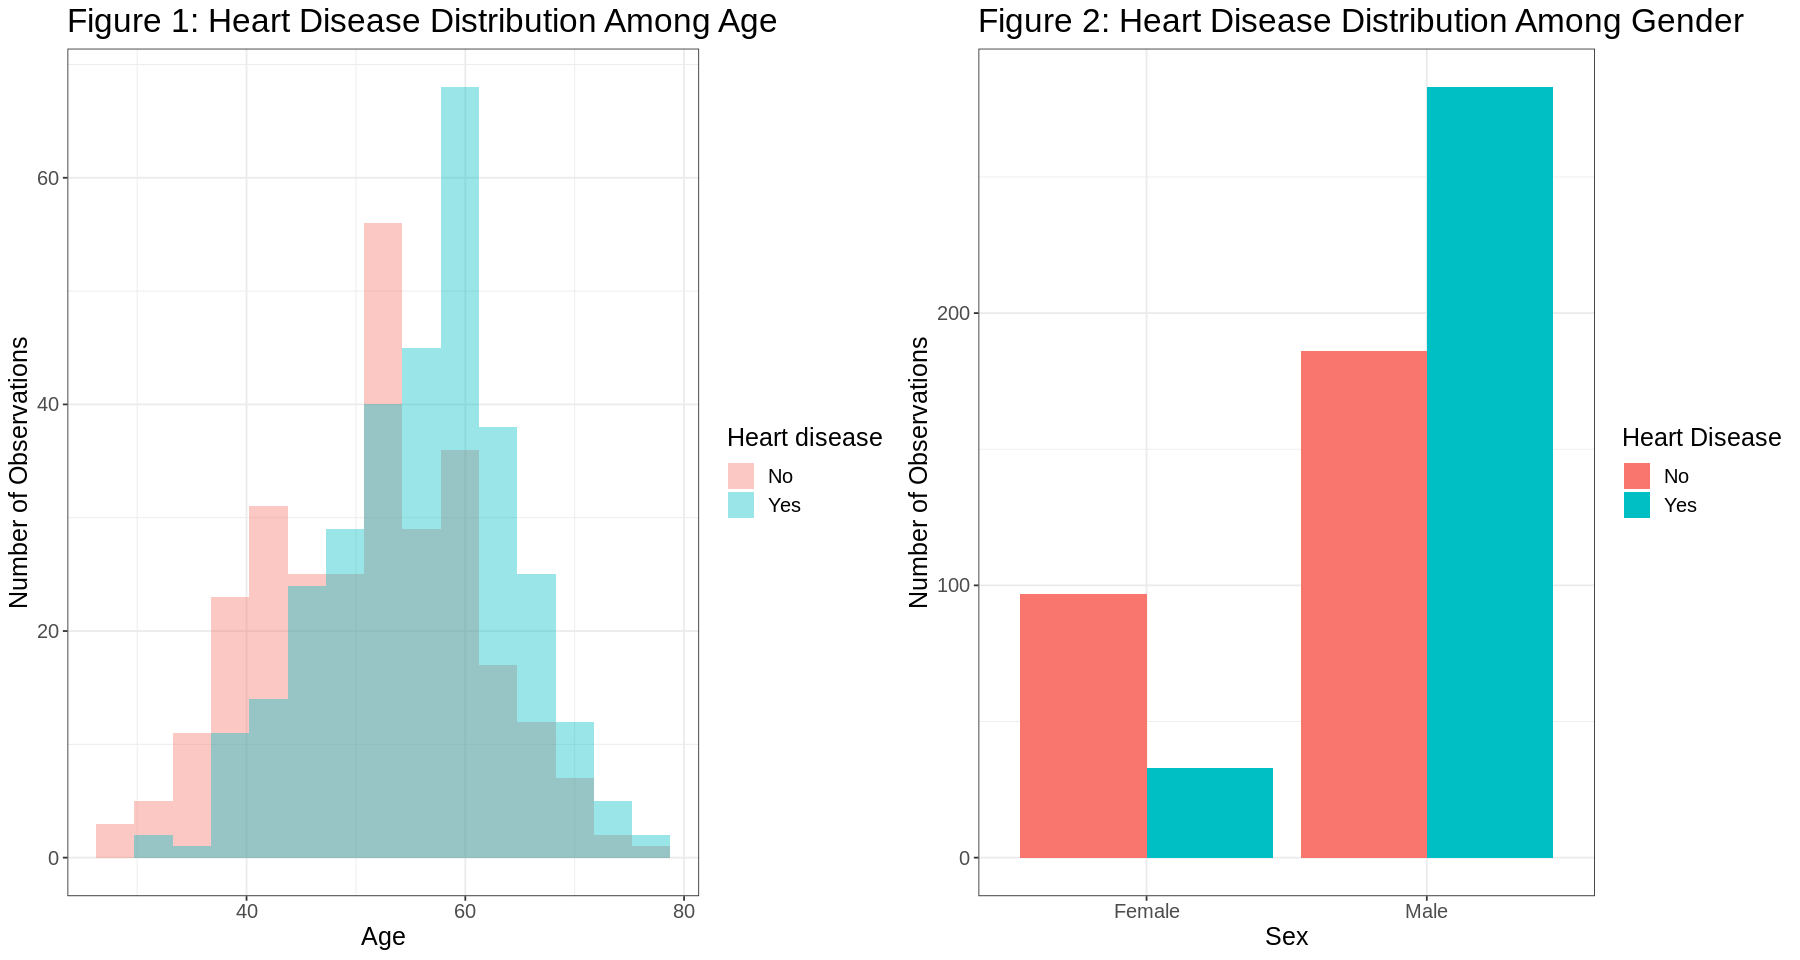

In [6]:
options(repr.plot.width = 15, repr.plot.height = 8)

age_distribution <- ggplot (heart_data_train, aes (x= age, fill = num))+
  geom_histogram (position = "identity", alpha = 0.4, bins =15)+
  theme_bw ()+
  xlab ("Age") +
  ylab ("Number of Observations")+
    labs (fill ="Heart disease")+
    scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 1: Heart Disease Distribution Among Age")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =15))

sex_distribution <- ggplot (heart_data_train, aes (x= sex, fill = num))+
  geom_histogram (position = "dodge", stat ="count")+
  theme_bw () +
  xlab ("Sex") +
  ylab ("Number of Observations")+
  labs (fill ="Heart Disease")+
  scale_x_discrete (labels = c("0" = "Female", "1" = "Male"))+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 2: Heart Disease Distribution Among Gender")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =15))

plot01 <- plot_grid (age_distribution, sex_distribution)
plot01

From figure 1, we can see that in the group of observations older than 50 most of the pople suffer from a heart disease, whereas most of the younger observations do not have a heart disease.

From figure 2, we can see that more men than women were observed. Additionally, we can see that in the group of men there are more people with a heart disease diagnosis than those without. In the group of women, however, there are less observations suffering from a heart disease. Generally speaking, most of the observations with a heart disease diagnosis in this dataset are men. 
The values are summarized in the table below. A zero as a entry in the Heart_Disease column means this observation does not have a heart disease, whereas a one means that this person suffers from a heart disease. A male observation is represented by a one in the sex column, a female person is a zero entry. 

In [12]:
#Creating a summary table
table_names <- heart_data_cleaned %>%
rename ("Heart_Disease" = "num")%>%
group_by (Heart_Disease, sex) %>%
summarize (n=n()) 
cat ("Table 2: Summary Table of the Heart Disease Distribution Among Gender")

table_names

`summarise()` has grouped output by 'Heart_Disease'. You can override using the
`.groups` argument.


Table 2: Summary Table of the Heart Disease Distribution Among Gender

Heart_Disease,sex,n
<fct>,<fct>,<int>
0,0,133
0,1,245
1,0,43
1,1,379


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


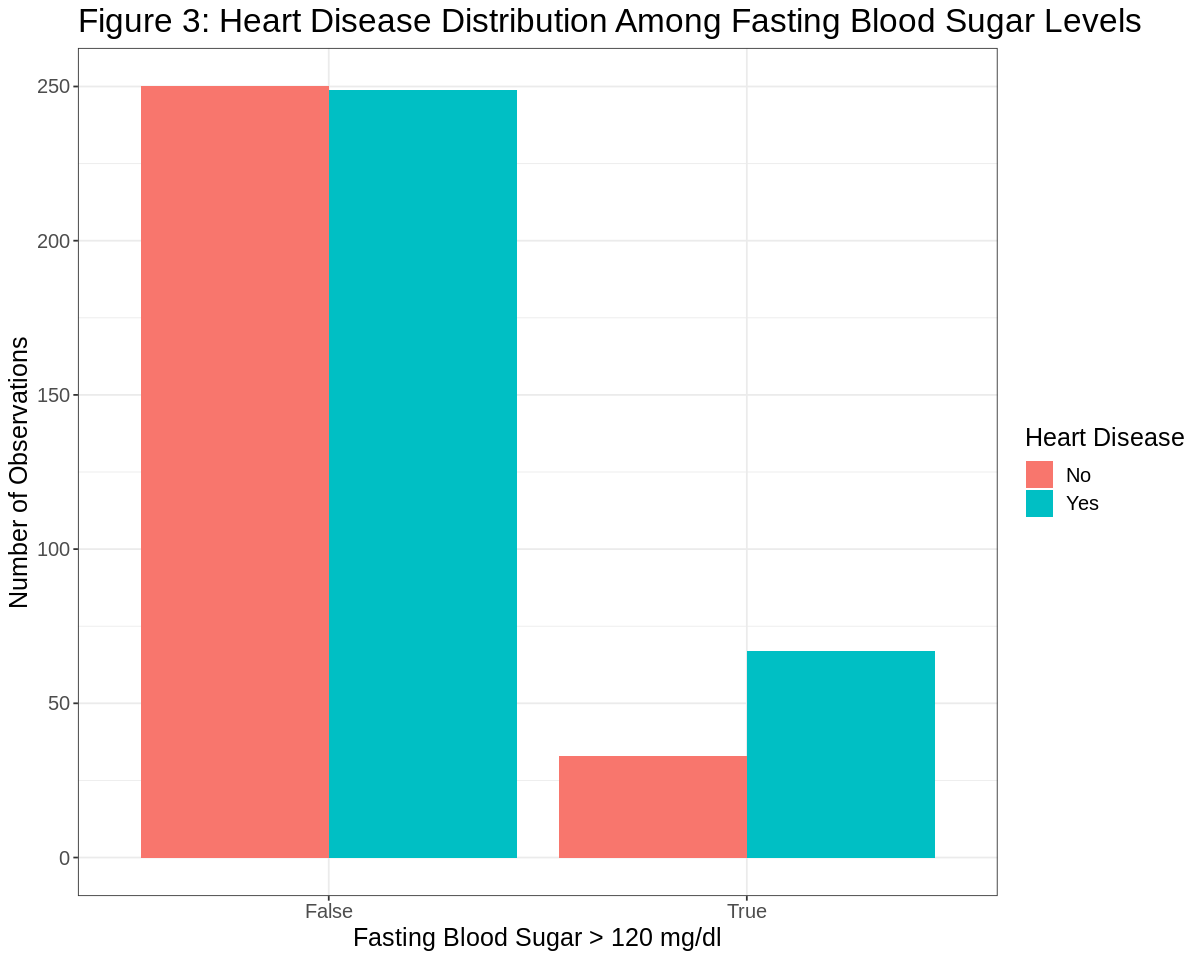

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8)

fbs_distribution <- ggplot (heart_data_train, aes (x= fbs, fill = num ))+
  geom_histogram (position = "dodge", stat = "count")+
  theme_bw () +
  xlab ("Fasting Blood Sugar > 120 mg/dl") +
  ylab ("Number of Observations")+
  labs (fill ="Heart Disease")+
  scale_x_discrete (labels = c("0" = "False", "1" = "True"))+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 3: Heart Disease Distribution Among Fasting Blood Sugar Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =15))
fbs_distribution 

From figure 3, we can see that most of the observations we are looking at have an fasting blood sugar <120 mg/dl meaning they do not have a diabetes. The observations who do not have a diabetes are equally distributed between having a heart disease or not. If we look at the group of people who have a fasting blood sugar >120 mg/dl we can see that there are more people who suffer from a heart disease than not. 
Below we summarized the values in a table. Again a zero as a entry in the Heart_Disease column means this observation does not have 
a heart disease, whereas a one means that this person suffers from a heart disease. A entry of zero in the fbs column means the observation does not have diabetes, whereas a person with the value one suffers from diabetes. 

In [9]:
#Creating a summary table
table_names <- heart_data_cleaned %>%
rename ("Heart_Disease" = "num")%>%
group_by (Heart_Disease,fbs) %>%
summarize (n=n())

table_names

`summarise()` has grouped output by 'Heart_Disease'. You can override using the
`.groups` argument.


Heart_Disease,fbs,n
<fct>,<fct>,<int>
0,0,335
0,1,43
1,0,331
1,1,91


Warning message:
“Removed 44 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


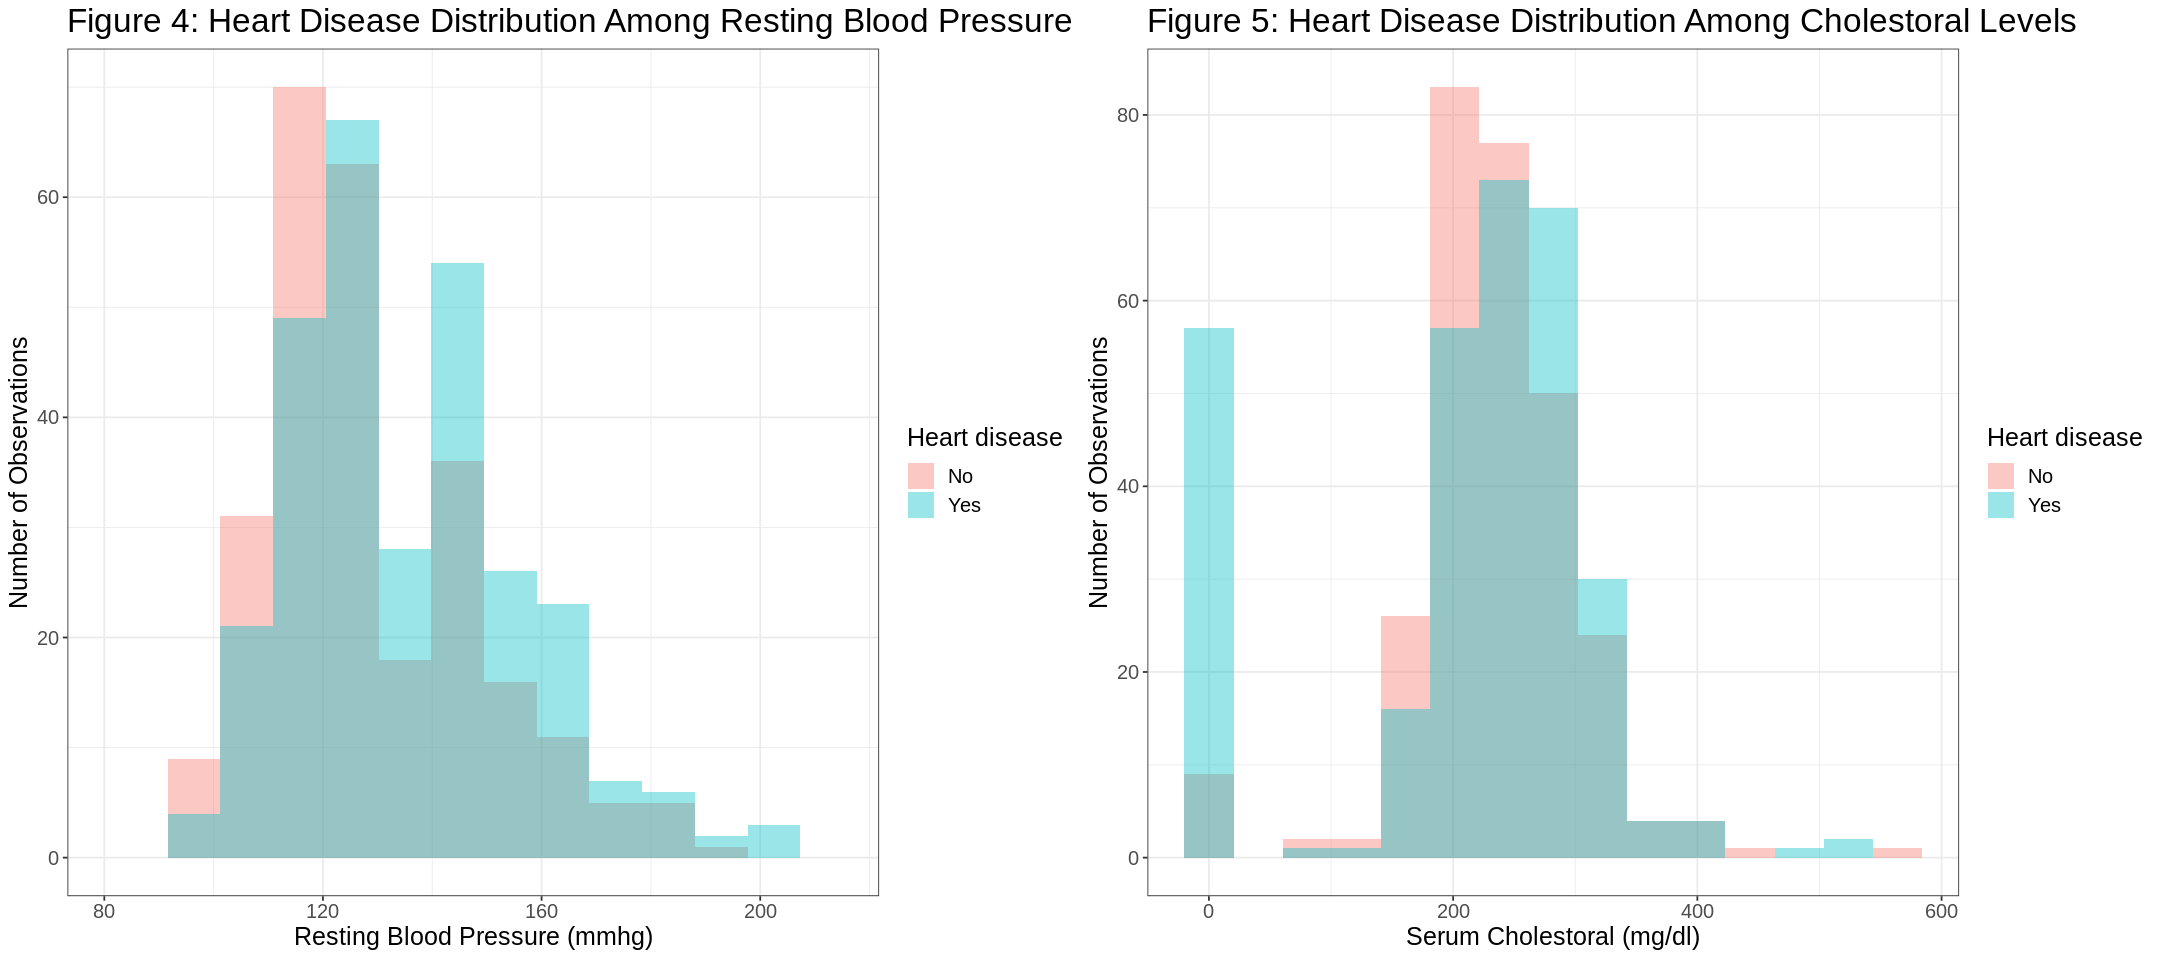

In [10]:
options(repr.plot.width = 18, repr.plot.height = 8)


trestbps_distribution <- ggplot (heart_data_train, aes (x= trestbps, fill = num))+
  geom_histogram (alpha = 0.4, bins = 15, position = "identity")+
  theme_bw ()+
  xlab ("Resting Blood Pressure (mmhg)") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
xlim (80, 215)+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 4: Heart Disease Distribution Among Resting Blood Pressure Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =15))
 

library (tidymodels)
chol_distribution <- ggplot (heart_data_train, aes (x= chol, fill = num))+
  geom_histogram (position = "identity", bins = 15, alpha = 0.4)+
  theme_bw ()+
  xlab ("Serum Cholestoral (mg/dl)") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
  scale_fill_discrete(labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 5: Heart Disease Distribution Among Cholestoral Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =15))

plot1.0 <- plot_grid (trestbps_distribution, chol_distribution)
plot1.0

In figure 4 above we can see that most of the observations with a high resting blood pressure in our dataset have a heart disease diagnosis, whereas the majority of people with a low resting blood pressure do not suffer from a heart disease. In figure 5 we notice that very small values of serum cholestoral go along with a high risk of having a heart disease as well as values between 250-350 mg/dl if we look at the observations in our dataset.
Most of the observations that show serum cholestoral values higher than zero and smaller than 250 mg/dl do not have a heart disaese.  

Next we examined the variables in a one by one comparison in a scatterplot and colored the data points differently based on their heart disease diagnosis.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 43 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 43 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


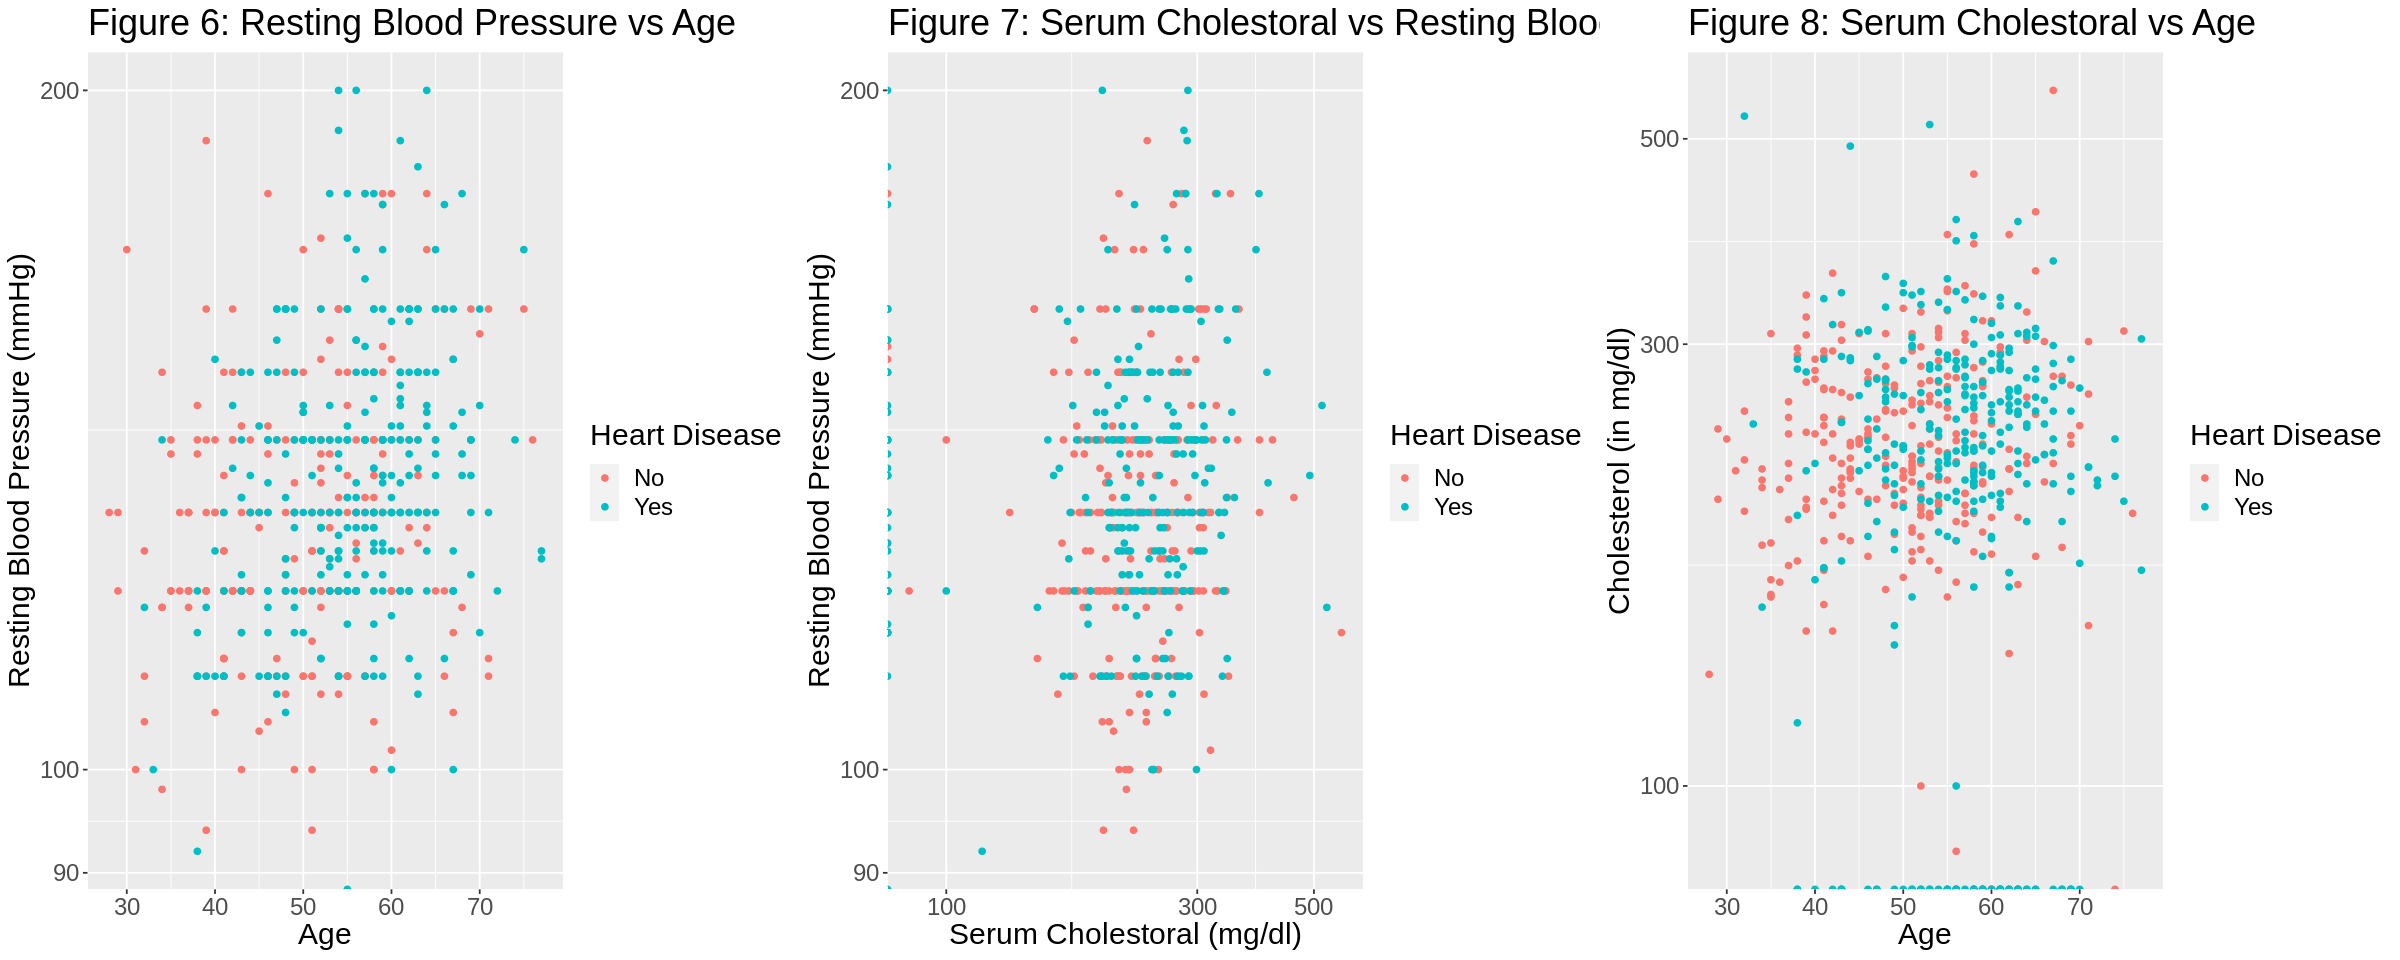

In [11]:
options(repr.plot.width = 20, repr.plot.height = 8)

age_vs_trestbps_plot <- heart_data_train |>
ggplot(aes(x= age, y = trestbps)) +
geom_point(aes(colour = num)) +
labs(x = "Age", y = "Resting Blood Pressure (mmHg)", colour = "Heart Disease") +
    ggtitle("Figure 6: Resting Blood Pressure vs Age")+
scale_color_discrete (labels= c("0" = "No", "1"= "Yes"))+
scale_y_log10 (labels= comma)+
theme(text = element_text(size = 18))

chol_vs_trestbps <- heart_data_train |>
    ggplot(aes(x=chol,y=trestbps,color = num))+
    geom_point()+
    xlab("Serum Cholestoral (mg/dl)")+
    ylab("Resting Blood Pressure (mmHg)")+
    labs(color="Heart Disease")+
scale_color_discrete (labels= c("0" = "No", "1"= "Yes"))+
    ggtitle("Figure 7: Serum Cholestoral vs Resting Blood Pressure")+
    theme(text = element_text(size = 18))+
   scale_x_log10(labels = comma) +
    scale_y_log10(labels = comma) 

age_vs_chol_plot <- heart_data_train |>
ggplot(aes(x= age, y = chol)) +
geom_point(aes(colour = num)) +
labs(x = "Age", y = "Cholesterol (in mg/dl)", colour = "Heart Disease") +
    ggtitle("Figure 8: Serum Cholestoral vs Age")+
scale_color_discrete (labels= c("0" = "No", "1"= "Yes"))+
scale_y_log10 (labels= comma)+
theme(text = element_text(size = 18))


plot <- plot_grid (age_vs_trestbps_plot, chol_vs_trestbps, age_vs_chol_plot, ncol=3)
plot

In figure 6 we see there is no relationship between age and the resting blood pressure between the heart disease groups. All ages tend to have most of their resting blood pressure above ~100 mm Hg. Figure 7 shows there is no relationship between Serum Cholestoral and Resting Blood Pressure between the heart disease diagnosis groups. As serum cholestoral increases, resting blood pressure neither increases or decreases in the two heart disease diagnosis groups. From the figure 8, we see that there is no relationship between age and cholesterol levels between the heart disease groups. All ages’ cholesterol is found between 200-400 mg/dl.

**Methods:**

From our data we only examine only six which are: age, sex, blood pressure, cholestrol, fasting blooding sugar, and heart disease diagnosis as described above and use it as predictor variables the apply k-nearest neighbour algorithm as our prediction model.

We have already splitted the dataset into a training (75% of the dataset) and testing set (25% of the dataset). Thereby we used the "tidymodels" package which automatically shuffles the original dataset and stratifies it to ensure the two split subsets of data have roughly equal proportions of the different labels.

To get a better estimate of accuracy of our knn classifier, we will utilize cross-validation where we split the training data into a training set and a validation set. By splitting the training data in multiple parts and using the average of the multiple splits as the estimate we can be sure to get an unbiased estimate of the k. Cross validation will help us to pick the K that maximizes validation accuracy. After we have decided on a K, we will evaluate the model built with the training set on the test set. 
After testing, if the model is not accurate or a good fit, we may decide to examine other variables from the dataset.

To visualize our results we will create pair-wise scatter plots and summary tables of all the six variables by using the ggpairs function in the GGally package. In these plots we will colour the actual versus the predicted labels on the testing set to examine the accuracy of the model visually. This kind of visualization facilitates to do the interpretation and to see whether there are relationships between the individual predicitors. 

**Expected outcomes and significance:**

**What do you expect to find?**

We expect to be able to create a predictive model of whether a patient has a heart disease or not based on the 6 variables we examined.

**What impact could such findings have?**

Many people have asymptomatic heart diseases which are often undiagnosed and in turn not treated for their disease. This could affect their quality of life. Thus with our predictive model, we can help diagnose patients with or without symptoms. Additionally, this could help healthcare providers as this could be an additional tool they could use in their practice. This could help lower costs for patients and the healthcare system as diagnosing a disease before it becomes severe could put measures in place to prevent further progression which could be costly.

**What future questions could this lead to?**

Future questions this project could lead to is to include the different stages and severity levels of a heart diseases and thereby asking for example whether a new patient already has a mild form of heart disase which could get worse. We would do this by additionally considering the range of values 1-4 of the variable "num" that are in the original dataset and that we summarized to a binary variable at the beginning. This would be an expansion to our current project in which we only ask whether a new patient is likely to have heart disase or not.

**References:**

1. Centers for Disease Control and Prevention. (2022, October 14). Heart disease facts. Centers for Disease Control and Prevention. Retrieved October 17, 2022, from https://www.cdc.gov/heartdisease/facts.htm 
2. Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. Retrieved October 18, 2022, from https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm 
3. Dai, H., Bragazzi, N. L., Younis, A., Zhong, W., Liu, X., Wu, J., & Grossman, E. (2021). Worldwide trends in prevalence, mortality, and disability-adjusted life years for hypertensive heart disease from 1990 to 2017. Hypertension, 77(4), 1223-1233.
4. Jin J. Testing for “Silent” Coronary Heart Disease. JAMA. 2014;312(8):858. doi:10.1001/jama.2014.9191

